In [1]:
!head -n 10 names/yob1880.txt

In [2]:
import pandas as pd

In [3]:
names1880 = pd.read_csv('names/yob1880.txt', names = ['name', 'sex', 'births'])

In [4]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [5]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [6]:
years = range(1880, 2022)

In [7]:
pieces = []
columns = ['name', 'sex', 'birth']

In [8]:
for year in years:
    path = 'names/yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] = year
    pieces.append(frame)

In [9]:
# Concatenate everything into a single dataframe (ie. joining all the pieces)
names = pd.concat(pieces, ignore_index = True)


# """
# NOTE:
# 1. Concat glues the DataFrame objects together ROW-WISE by default.
# 2. We are passing ignore_index=True because we’re not interested in preserving the original row numbers returned from
# read_csv.
# """

In [10]:
names

,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2052776,Zyeire,M,5,2021
2052777,Zyel,M,5,2021
2052778,Zyian,M,5,2021
2052779,Zylar,M,5,2021


In [11]:
# With this data in hand, we can already start aggregating the data at the year and sex
# level using groupby or pivot_table,

In [12]:
total_births = names.pivot_table('birth', index='year', columns='sex', aggfunc=sum)

In [13]:
total_births

sex,F,M
year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112319,104625
1884,129019,114442
...,...,...
2017,1723043,1847191
2018,1696917,1811738
2019,1673030,1788414


In [14]:
# total_births.plot(title = 'Total births by year and gender')

<Axes: title={'center': 'Total births by year and gender'}, xlabel='year'>

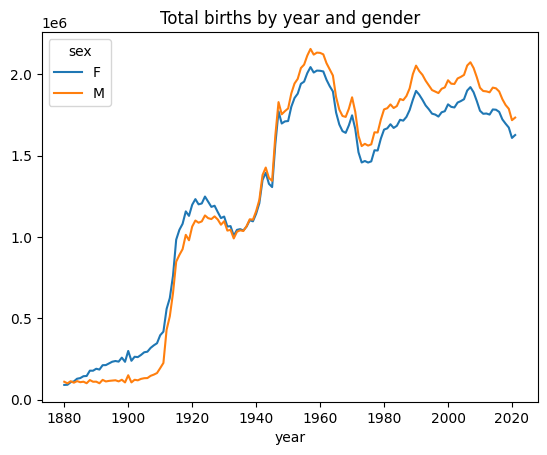

In [15]:
total_births.plot(title = 'Total births by year and gender')

In [16]:
total_births.tail()

sex,F,M
year,,
2017,1723043,1847191
2018,1696917,1811738
2019,1673030,1788414
2020,1609171,1718248
2021,1627098,1734277


In [17]:
# adding proportions
def add_prop(group):
    # Integer driven floors
    births = group.birth.astype(float)
    
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex'], group_keys = False).apply(add_prop)

In [18]:
names

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2052776,Zyeire,M,5,2021,0.000003
2052777,Zyel,M,5,2021,0.000003
2052778,Zyian,M,5,2021,0.000003
2052779,Zylar,M,5,2021,0.000003


In [19]:
import numpy as np

In [20]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

# This is to  sanity check if all values of prop sum to 1

True

In [21]:
# # to extract a subset of the data to facilitate further
# analysis: the top 1000 names for each sex/year combination.

def get_top1000(group):
    return group.sort_values(by = 'birth', ascending = False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [22]:
top1000

name sex  birth  year      prop
year sex                                              
1880 F   0             Mary   F   7065  1880  0.077642
         1             Anna   F   2604  1880  0.028617
         2             Emma   F   2003  1880  0.022012
         3        Elizabeth   F   1939  1880  0.021309
         4           Minnie   F   1746  1880  0.019188
...                     ...  ..    ...   ...       ...
2021 M   2039783        Zev   M    218  2021  0.000126
         2039789     Harris   M    217  2021  0.000125
         2039793     Ronnie   M    217  2021  0.000125
         2039792    Merrick   M    217  2021  0.000125
         2039791     Mayson   M    217  2021  0.000125

[283876 rows x 5 columns]

In [23]:
# Another approach

pieces = []

for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by = 'birth', ascending=False)[:1000])
    
top1000 = pd.concat(pieces, ignore_index=True)

In [24]:
names.groupby(['year', 'sex'])

In [25]:
names

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2052776,Zyeire,M,5,2021,0.000003
2052777,Zyel,M,5,2021,0.000003
2052778,Zyian,M,5,2021,0.000003
2052779,Zylar,M,5,2021,0.000003


In [26]:
top1000

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
283871,Zev,M,218,2021,0.000126
283872,Harris,M,217,2021,0.000125
283873,Ronnie,M,217,2021,0.000125
283874,Merrick,M,217,2021,0.000125


# Analyzing naming trends

In [27]:
# Splitting the Top 1,000 names into the boy and girl portions

boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [28]:
# form a pivot table of the total number of births by year and name:
total_births = top1000.pivot_table('birth', index = 'year', columns = 'name', aggfunc=sum)

In [29]:
total_births

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aarna,Aaron,Aarush,Aarya,Ab,...,Zola,Zollie,Zona,Zora,Zoya,Zula,Zuri,Zyair,Zyaire,Zyon
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,...,7.0,NaN,8.0,28.0,NaN,27.0,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,...,10.0,NaN,9.0,21.0,NaN,27.0,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,...,9.0,NaN,17.0,32.0,NaN,21.0,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,...,10.0,NaN,11.0,35.0,NaN,25.0,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,...,14.0,6.0,8.0,58.0,NaN,27.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,241.0,291.0,4185.0,NaN,526.0,NaN,7211.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,850.0,NaN,301.0,NaN
2018,NaN,NaN,3834.0,NaN,488.0,NaN,5982.0,NaN,NaN,NaN,...,276.0,NaN,NaN,269.0,NaN,NaN,1131.0,NaN,323.0,NaN
2019,NaN,NaN,3654.0,NaN,419.0,NaN,5529.0,NaN,NaN,NaN,...,265.0,NaN,NaN,353.0,NaN,NaN,1181.0,NaN,540.0,213.0


In [30]:
subset = total_births[['John', 'Aaron', 'Zuri', 'Steve']]

In [31]:
subset

name,John,Aaron,Zuri,Steve
year,,,,
1880,9701.0,102.0,NaN,52.0
1881,8795.0,94.0,NaN,44.0
1882,9597.0,85.0,NaN,63.0
1883,8934.0,105.0,NaN,62.0
1884,9428.0,97.0,NaN,66.0
...,...,...,...,...
2017,9510.0,7211.0,850.0,NaN
2018,9179.0,5982.0,1131.0,NaN
2019,8831.0,5529.0,1181.0,NaN


<Axes: title={'center': 'Number of births per year'}, xlabel='year'>

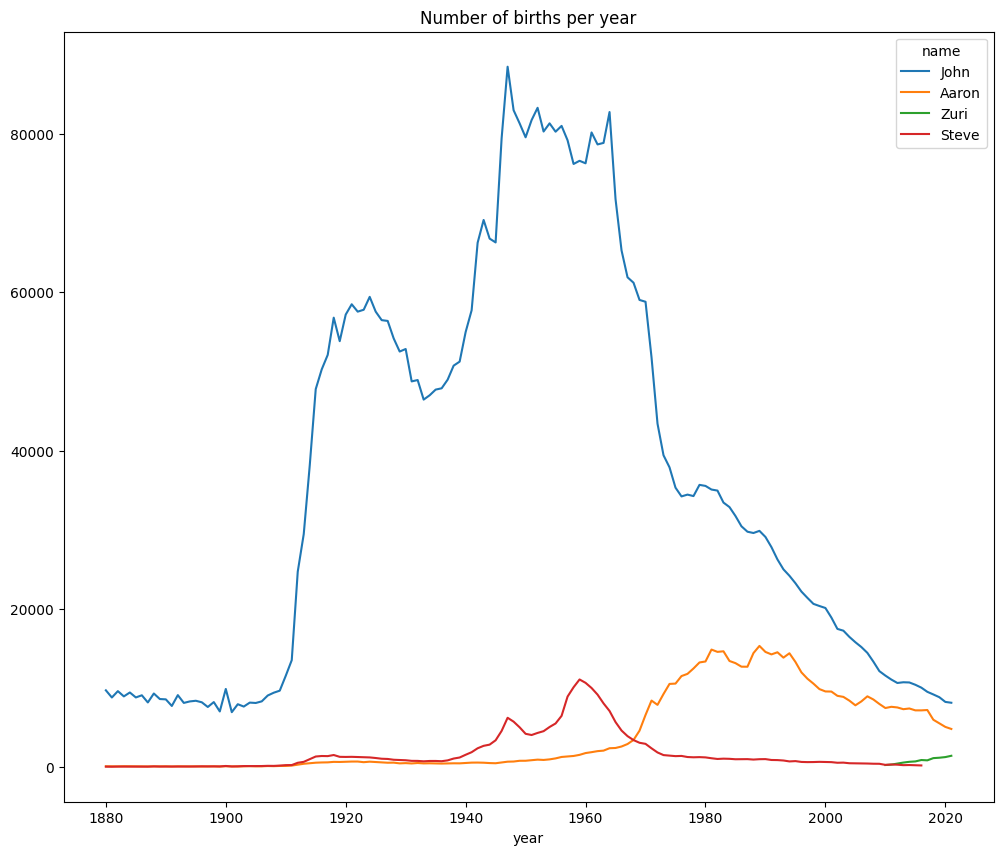

In [32]:
subset.plot(subplots=False, figsize=(12,10), grid=False, title= 'Number of births per year')

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

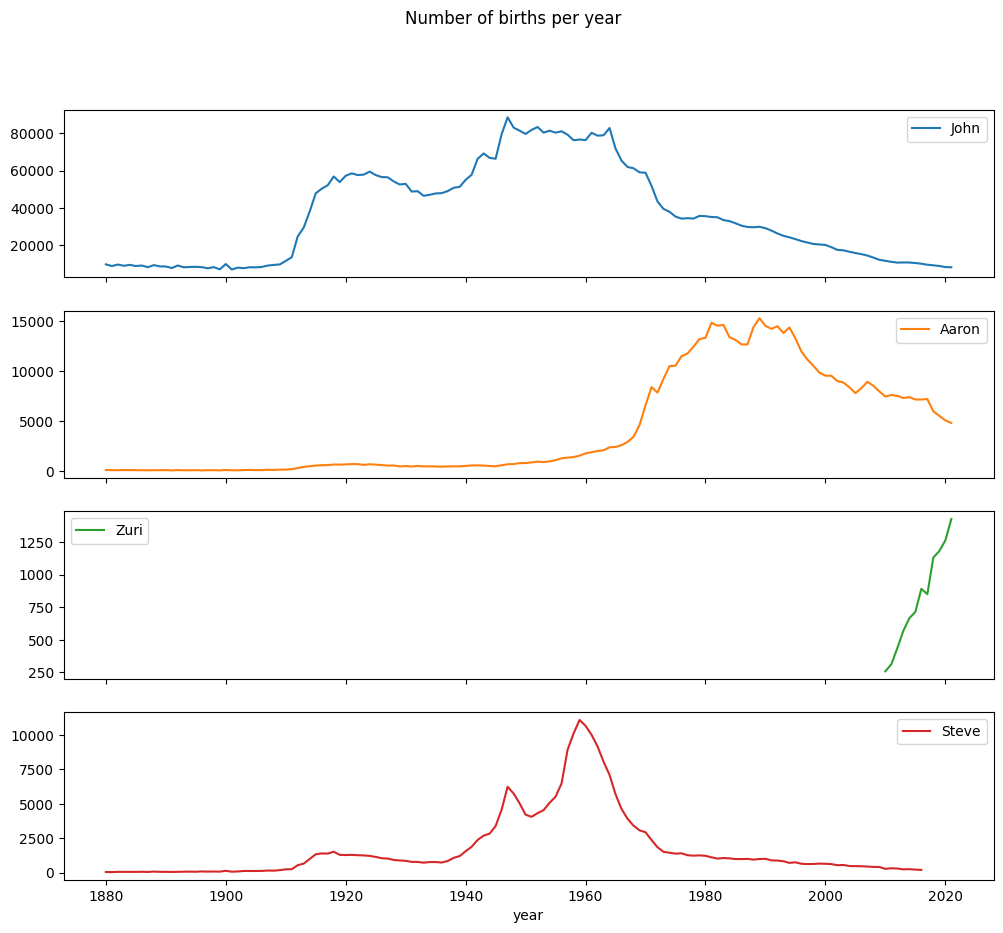

In [33]:
subset.plot(subplots=True, figsize=(12,10), grid=False, title= 'Number of births per year')

<Axes: title={'center': 'Number of births per year'}, xlabel='year'>

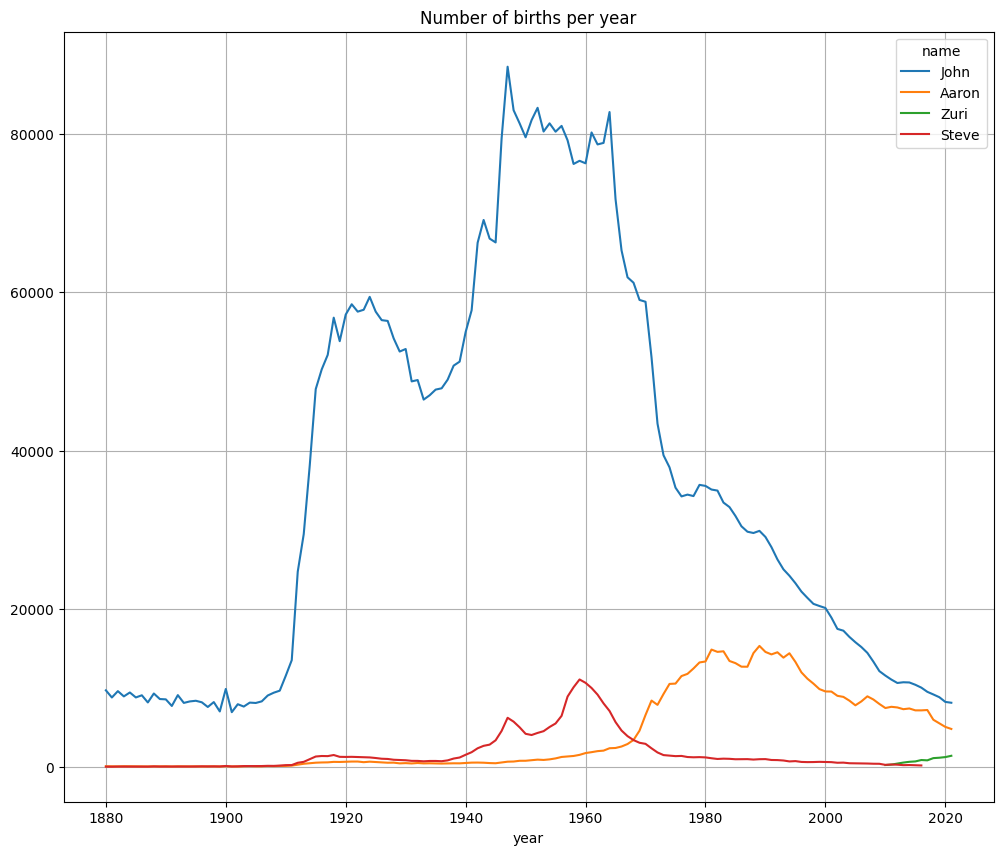

In [34]:
subset.plot(subplots=False, figsize=(12,10), grid=True, title= 'Number of births per year')

## Measuring the increase in naming diversity

In [35]:
table = top1000.pivot_table('prop', index = 'year', columns = 'sex', aggfunc=sum)

<Axes: title={'center': 'Sum of top1000.prop by gender and year'}, xlabel='year'>

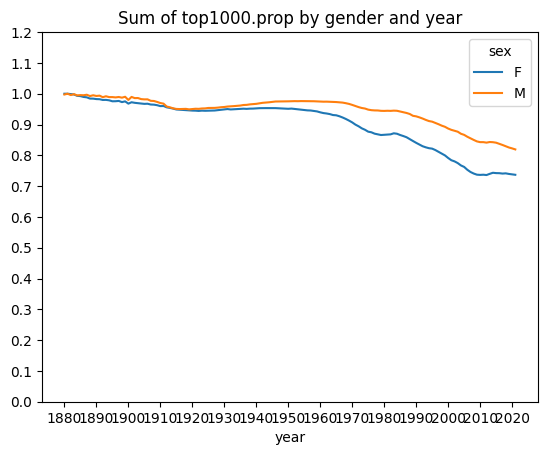

In [36]:
table.plot(title = 'Sum of top1000.prop by gender and year', yticks = np.linspace(0, 1.2, 13), xticks= range(1880, 2023, 10))

In [37]:
df = boys[boys.year == 2010]

In [38]:
df

,name,sex,birth,year,prop
260876,Jacob,M,22139,2010,0.011546
260877,Ethan,M,18008,2010,0.009392
260878,Michael,M,17366,2010,0.009057
260879,Jayden,M,17191,2010,0.008966
260880,William,M,17060,2010,0.008897
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


In [39]:
prop_cumsum = df.sort_values(by= 'prop', ascending = False).prop.cumsum()

In [40]:
prop_cumsum[:10]

260876    0.011546
260877    0.020938
260878    0.029995
260879    0.038961
260880    0.047858
260881    0.056599
260882    0.065185
260883    0.073453
260884    0.081559
260885    0.089644
Name: prop, dtype: float64

In [41]:
prop_cumsum.searchsorted(0.5)

116

In [42]:
# By contrast, in 1900 this number was much smaller:

In [43]:
df = boys[boys.year == 1900]

In [44]:
df

,name,sex,birth,year,prop
40876,John,M,9829,1900,0.065319
40877,William,M,8579,1900,0.057012
40878,James,M,7245,1900,0.048147
40879,George,M,5403,1900,0.035906
40880,Charles,M,4098,1900,0.027233
...,...,...,...,...,...
41871,Theron,M,8,1900,0.000053
41872,Terrell,M,8,1900,0.000053
41873,Stonewall,M,8,1900,0.000053
41874,Solon,M,8,1900,0.000053


In [45]:
in1990 = df.sort_values(by = 'prop', ascending=False).prop.cumsum()

In [46]:
in1990.searchsorted(0.5) + 1

25

In [47]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by= 'prop', ascending=False)
    return group.prop.cumsum().searchsorted(q)+1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [48]:
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2017,254,143
2018,259,149
2019,264,155


<Axes: title={'center': 'Number of names in top 50%\n(this shows the diversity in the number of names)'}, xlabel='year'>

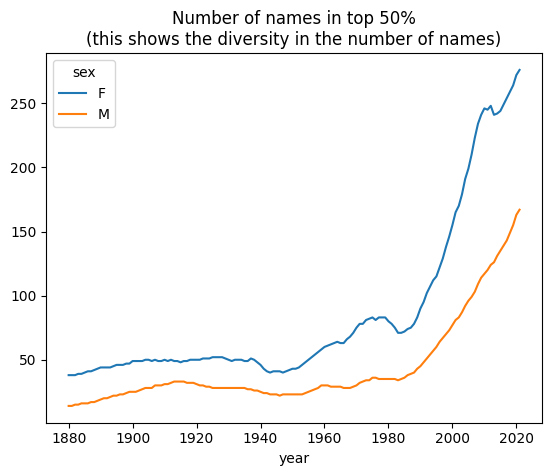

In [49]:
diversity.plot(title= 'Number of names in top 50%\n(this shows the diversity in the number of names)')

## The Last letter revolution

In [50]:
# extract the last letter 
get_last_letter = lambda x:x[-1]

last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('birth', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [51]:
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4783.0   5566.0   5701.0   6602.0   6623.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2910.0   3527.0   3848.0   4807.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3575.0   3836.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2038.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2824.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10467.0  10404.0  12143.0  12063.0  13918.0  13927.0  14932.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2012      2013      2014   
last_letter                             ...                                 
a            48942.0  59440.0  58631.0  ...   27227.0   27473.0   28318.0   
b                NaN      NaN      NaN  ...   34745.0   33278.0   31410.0   
c                NaN      NaN      NaN  ...   24293.0   24090.0   23847.0   
d             1027.0   1298.0   1374.0  ...   42520.0   42719.0   44077.0   
e            54353.0  66748.0  66662.0  ...  128591.0  132323.0  132195.0   
f                NaN      NaN      NaN  ...    2482.0    2593.0    2882.0   
g               25.0     44.0     28.0  ...    3807.0    4430.0    4724.0   
h             7141.0   8630.0   8825.0  ...   99135.0  100022.0  102156.0   
i              105.0    141.0    134.0  ...   47156.0   45456.0   46634.0   
j                NaN      NaN      NaN  ...    1500.0    1405.0    1360.0   
k               19.0     21.0     22.0  ...   34141.0   34887.0   35794.0   
l             6174.0   7900.0   8395.0  ...  129078.0  126884.0  127612.0   
m               90.0    123.0    137.0  ...   55109.0   57108.0   58765.0   
n             5512.0   6832.0   7103.0  ...  682713.0  669666.0  673646.0   
o               97.0    134.0    142.0  ...   78259.0   79519.0   82402.0   
p                NaN      NaN      NaN  ...    2527.0    2598.0    2524.0   
q                NaN      NaN      NaN  ...     337.0     336.0     312.0   
r              910.0   1207.0   1214.0  ...  167657.0  170458.0  178236.0   
s             2803.0   3581.0   3569.0  ...  122072.0  123889.0  128272.0   
t             3140.0   3816.0   3784.0  ...

In [52]:
subtable = table.reindex(columns=[1910, 1960, 2020], level='year')

In [53]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2020     1910      1960      2020
last_letter                                                           
a            108399.0  691285.0  614720.0    977.0    5214.0   33800.0
b                 NaN     694.0     530.0    411.0    3910.0   18067.0
c                 5.0      49.0     892.0    482.0   15456.0   16652.0
d              6751.0    3732.0    3810.0  22112.0  262106.0   38875.0
e            133601.0  435009.0  285170.0  28665.0  178742.0  116438.0

In [54]:
# normalize the table by total births to compute a new table containing proportion
# of total births for each sex ending in each letter:

subtable.sum()

sex  year
F    1910     396505.0
     1960    2022001.0
     2020    1609171.0
M    1910     194209.0
     1960    2131990.0
     2020    1718248.0
dtype: float64

In [55]:
letter_prop = subtable / subtable.sum().astype(float)

In [56]:
letter_prop

sex                 F                             M                    
year             1910      1960      2020      1910      1960      2020
last_letter                                                            
a            0.273386  0.341882  0.382010  0.005031  0.002446  0.019671
b                 NaN  0.000343  0.000329  0.002116  0.001834  0.010515
c            0.000013  0.000024  0.000554  0.002482  0.007250  0.009691
d            0.017026  0.001846  0.002368  0.113857  0.122940  0.022625
e            0.336947  0.215138  0.177215  0.147599  0.083838  0.067766
f                 NaN  0.000010  0.000100  0.000783  0.004330  0.001584
g            0.000144  0.000157  0.000441  0.002260  0.009489  0.002668
h            0.051530  0.036223  0.069228  0.045564  0.037912  0.054557
i            0.001526  0.039963  0.047694  0.000844  0.000610  0.032479
j                 NaN       NaN  0.000088       NaN       NaN  0.000850
k            0.000121  0.000155  0.000360  0.036579  0.049374  0.020387
l            0.043187  0.033871  0.021234  0.065023  0.104892  0.065405
m            0.001200  0.008611  0.004165  0.058046  0.033831  0.032879
n            0.079237  0.130675  0.113894  0.143387  0.152513  0.314598
o            0.001672  0.002440  0.002169  0.017064  0.012841  0.060123
p            0.000018  0.000023  0.000094  0.003172  0.005674  0.001514
q                 NaN       NaN  0.000042       NaN       NaN  0.000192
r            0.013395  0.006766  0.033279  0.064472  0.031044  0.095177
s            0.039036  0.012764  0.011786  0.130797  0.102699  0.077977
t            0.027432  0.015198  0.014757  0.072885  0.065646  0.032806
u            0.000683  0.000575  0.000668  0.000124  0.000057  0.003373
v                 NaN  0.000060  0.000294  0.000113  0.000036  0.001691
w            0.000020  0.000031  0.004174  0.006323  0.007707  0.009996
x            0.000015  0.000037  0.002094  0.003965  0.001851  0.011664
y            0.110975  0.152551  0.110301  0.077345  0.161003  0.047805
z            0.002436  0.000658  0.000659  0.000170  0.000184  0.002009

In [57]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Female'}, xlabel='last_letter'>

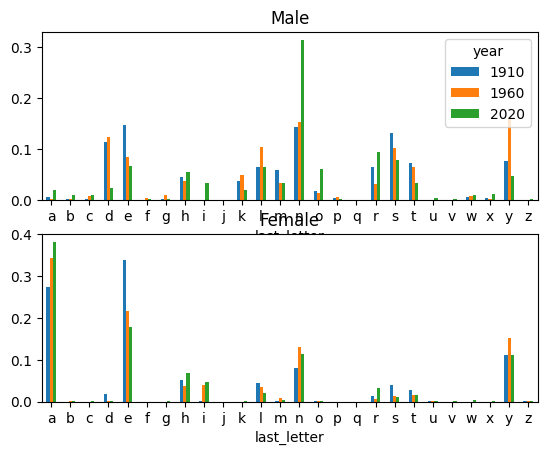

In [58]:
%matplotlib inline
fig, axes = plt.subplots(2, 1)
letter_prop['M'].plot(kind='bar', rot=0, ax = axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax = axes[1], title='Female', legend = False)

In [59]:
# As you can see, boy names ending in “n” have experienced significant growth since the 1960s.

In [60]:
# Again normalize by year and sex
# and select a subset of letters for the boy names, finally transposing to make each column
# a time series:

In [61]:
letter_prop = table / table.sum().astype(float)

In [62]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T # d, n, y are just letters chosen

In [63]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


<Axes: xlabel='year'>

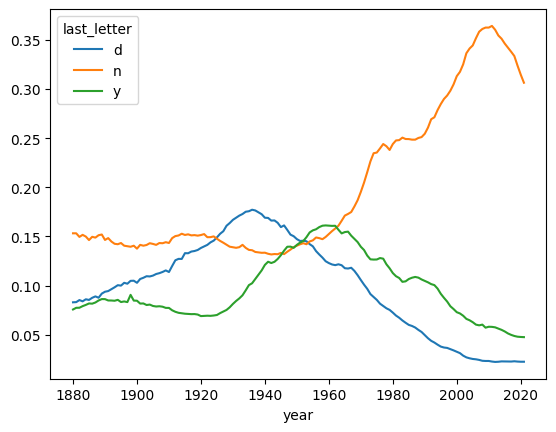

In [64]:
dny_ts.plot()

## Boy names that became girl names (and vice-versa)

In [65]:
all_names = top1000.name.unique()

In [66]:
# Seeing for a name called lesley/ leslie

In [67]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [68]:
lesley_like = all_names[mask]

In [69]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [70]:
# From there, we can filter down to just those names and sum births grouped by name
# to see the relative frequencies

In [71]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [72]:
filtered

,name,sex,birth,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2461,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4511,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
274325,Leslie,F,703,2017,0.000408
276396,Leslie,F,600,2018,0.000354
278412,Leslie,F,571,2019,0.000341
280471,Leslie,F,486,2020,0.000302


In [73]:
filtered.groupby('name').birth.sum()

name
Leslee      1082
Lesley     35038
Lesli        929
Leslie    379721
Lesly      11433
Name: birth, dtype: int64

In [74]:
# aggregate by sex and year and normalize within year

In [75]:
table = filtered.pivot_table('birth', index='year', columns='sex', aggfunc=sum)

In [76]:
table = table.div(table.sum(1), axis=0) # I too didn't understand this 🥲

In [77]:
table.tail()

sex,F,M
year,,
2017,1.0,NaN
2018,1.0,NaN
2019,1.0,NaN
2020,1.0,NaN
2021,1.0,NaN


In [78]:
# Making the plot

<Axes: xlabel='year'>

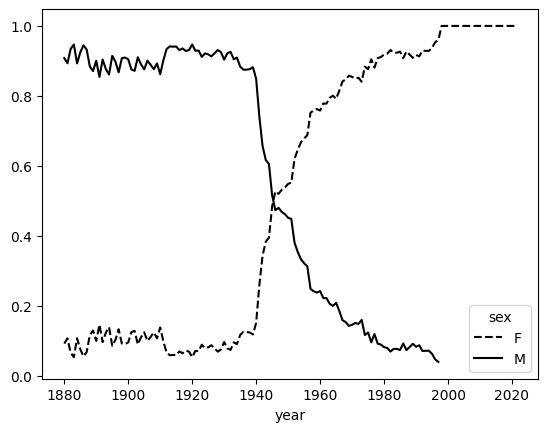

In [79]:
table.plot(style={'M': 'k-', 'F':'k--'})

In [80]:
# This means around 1950, people were confused by leslie-like names if it was boy/girl XD